# Introduction to Statistical Power
**Author**: Paul M. Magwene

If viewing this as a live notebook, or using the nbviewer, use the "Show Code" button below to toggle the display of the Python code that generated the figures.

If viewing this notebook via GitHub you might want to use [this nbviewer link](http://nbviewer.jupyter.org/github/Bio204-class/bio204-notebooks/blob/master/inclass-2016-03-09-Introduction-to-Statistical-Power.ipynb) to view this notebook.

In [1]:
%%html
<script>
  function code_toggle() {
    if (code_shown){
      $('div.input').hide('500');
      $('#toggleButton').val('Show Code')
    } else {
      $('div.input').show('500');
      $('#toggleButton').val('Hide Code')
    }
    code_shown = !code_shown
  }

  $( document ).ready(function(){
    code_shown=false;
    $('div.input').hide()
  });
</script>
<form action="javascript:code_toggle()"><input type="submit" id="toggleButton" value="Show Code"></form>

In [2]:
%matplotlib inline
import numpy as np
import scipy.stats as stats
import matplotlib.pyplot as plt

In [3]:
np.random.seed(20160309)

## Outcomes of hypothesis tests

In standard statistical hypothesis testing there are two real possibilities -- the null hypothesis is true or the alternative hypothesis is true. When you carry out a hypothesis test, there are two possible test outcomes --  you reject the null hypothesis or you fail to reject the null hypothesis.  It is typical to represent the different combinations of the reality / statistical tests in a table like the following:


|            | do not reject $H_0$           | reject $H_0$                   |
|------------|:-----------------------------:|:------------------------------:|
|$H_0$ true  | okay                          | Type 1 error (false positive), $\alpha$ |
|$H_A$ true  | Type 2 error (false negative), $\beta$ | okay                           |

When we specify a significance threshold, $\alpha$, for hypothesis testing, this controls the Type I error (false positive rate) of our test.  The false negative rate is often referred to as $\beta$.  In general, there is a tradeoff between the false positive and false negative rate -- the lower the false positive rate the higher the false negative rate, and vice versa.

### Statistical Power

The power of a statistical test is defined as:
$$
\mbox{Power}\ = P(\mbox{reject}\ H_0\ |\ H_A \mbox{is true})
$$

In words, this is the probability that the null hypothesis is rejected, conditional on the alternative hypothesis being true.

If $\beta$ is the false negative rate, then 
$$
\mbox{Power}\ = 1 - \beta
$$

## Exploring statistical power for one-sample t-tests

We'll use a one-sample t-tests to illustrate the concept of statistical power. For this example, we'll explore the power of the t-test to distinguish between the null hypothesis that the data of interest are $H_0 \sim N(\mu=0,\sigma=1)$ and a true underlying distribution $H_A \sim N(\mu \neq 0, \sigma=1)$.


### Effect of sample size on power

First we'll hold the effect size ( $|\mu_{H_A} - \mu_{H_0}|$ ) constant and vary sample size.

Consider the population distributions below for the null hypothesis (red) and true underlying distribution (black).  Both have the same standard deviation ($\sigma = 1$) and differ only in their means ($\mu_{H_0} = 0$ and $\mu_{H_A} = 0.5$).

#### Population Distributions

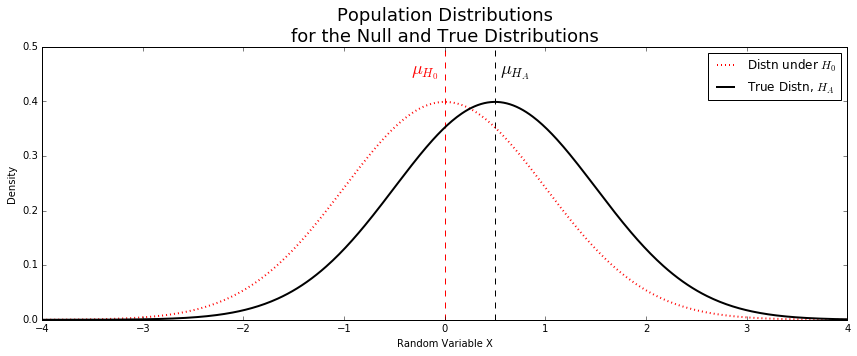

In [4]:
muH0, muHA = 0, 0.5
sigma = 1

fig, ax1 = plt.subplots(figsize=(12,5))
x = np.linspace(-4, 4, 500)

ax1.plot(x, stats.norm.pdf(x, loc=muH0, scale=sigma), color='red', 
         linestyle='dotted', linewidth=2, label='Distn under $H_0$')
ax1.plot(x, stats.norm.pdf(x, loc=muHA, scale=sigma), color='black', 
         linewidth=2, label='True Distn, $H_A$')

offset = 0.2
ax1.text(muH0 - offset, 0.45, "$\mu_{H_0}$", 
         horizontalalignment='center', color='red', fontsize=18)
ax1.text(muHA + offset, 0.45, "$\mu_{H_A}$", 
         horizontalalignment='center', color='black', fontsize=18)

ax1.set_ylim(0, 0.5)
ax1.vlines(muH0,0,0.5,color='red', linestyle='dashed')
ax1.vlines(muHA,0,0.5,color='black', linestyle='dashed')
ax1.legend(loc='best')
ax1.set_xlabel("Random Variable X")
ax1.set_ylabel("Density")
ax1.set_title("Population Distributions\nfor the Null and True Distributions",fontsize=18)
fig.tight_layout()
#fig.savefig("fig-H0distn-vs-TrueDistn.pdf")
pass

#### Sampling distributions of the mean

Now imagine taking samples of size n=10, n=25, and n=50.  What will happen to the **sampling distributions of the mean**?  We've encountered this repeatedly before -- the sampling distribution of the mean should be centered around the true population mean, and should have standard deviations given by $\frac{\sigma}{\sqrt{n}}$ (remember that the standard deviation of a sampling distribution is called a "standard error").

Here is what the expected sampling distributions of the mean look like for the null and true distributions with samples of size 10, 25, and 50.

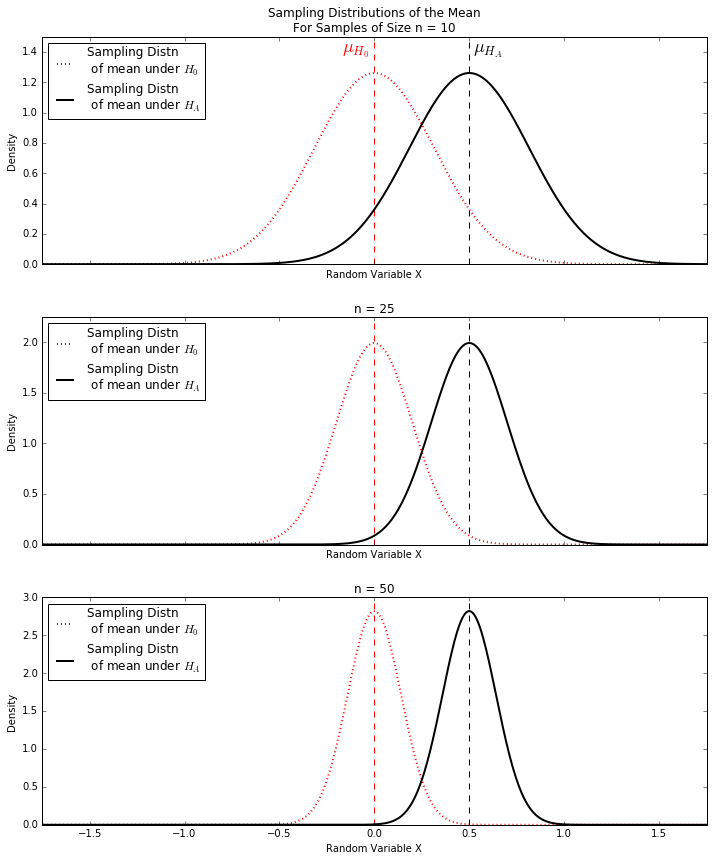

In [5]:
n1, n2, n3 = 10, 25, 50

fig, (ax1,ax2,ax3) = plt.subplots(3, 1, figsize=(10,12), sharex=True)

x = np.linspace(-2, 2, 500)
ax1.plot(x, stats.norm.pdf(x, scale=1/np.sqrt(n1)), color='red', linestyle='dotted', linewidth=2,
        label='Sampling Distn\n of mean under $H_0$')
ax1.plot(x, stats.norm.pdf(x, loc=0.5, scale=1/np.sqrt(n1)), color='black', linewidth=2,
        label='Sampling Distn\n of mean under $H_A$')

offset = 0.1

ax1.text(muH0 - offset, 1.4, "$\mu_{H_0}$", 
         horizontalalignment='center', color='red', fontsize=18)
ax1.text(muHA + offset, 1.4, "$\mu_{H_A}$", 
         horizontalalignment='center', color='black', fontsize=18)
ax1.set_ylim(0, 1.5)
ax1.set_xlim(-1.75,1.75)
ax1.vlines(0,0,1.5,color='red', linestyle='dashed')
ax1.vlines(0.5,0,1.5,color='black', linestyle='dashed')
ax1.legend(loc='upper left')
ax1.set_xlabel("Random Variable X")
ax1.set_ylabel("Density")
ax1.set_title("""Sampling Distributions of the Mean
For Samples of Size n = {}""".format(n1))

ax2.plot(x, stats.norm.pdf(x, scale=1/np.sqrt(n2)), color='red', linestyle='dotted', linewidth=2,
        label='Sampling Distn\n of mean under $H_0$')
ax2.plot(x, stats.norm.pdf(x, loc=0.5, scale=1/np.sqrt(n2)), color='black', linewidth=2,
        label='Sampling Distn\n of mean under $H_A$')

ax2.set_ylim(0, 2.25)
ax2.vlines(0,0,2.25,color='red', linestyle='dashed')
ax2.vlines(0.5,0,2.25,color='black', linestyle='dashed')
ax2.legend(loc='upper left')
ax2.set_xlabel("Random Variable X")
ax2.set_ylabel("Density")
ax2.set_title("""n = {}""".format(n2))


ax3.plot(x, stats.norm.pdf(x, scale=1/np.sqrt(n3)), color='red', linestyle='dotted', linewidth=2,
        label='Sampling Distn\n of mean under $H_0$')
ax3.plot(x, stats.norm.pdf(x, loc=0.5, scale=1/np.sqrt(n3)), color='black', linewidth=2,
        label='Sampling Distn\n of mean under $H_A$')

ax3.set_ylim(0, 3)
ax3.vlines(0,0,3,color='red', linestyle='dashed')
ax3.vlines(0.5,0,3,color='black', linestyle='dashed')
ax3.legend(loc='upper left')
ax3.set_xlabel("Random Variable X")
ax3.set_ylabel("Density")
ax3.set_title("""n = {}""".format(n3))

fig.tight_layout(h_pad=2.5)
#fig.savefig("fig-H0sampling-vs-Truesampling.pdf")
pass

From the figures above we see that as sample size increases, the sampling distributions of the mean for the null and true distributions have less and less overlap, suggesting that as sample size increases the probability that we corrected reject the null hypothesis will increase as well.

### Exploring power with simulations: varying sample size

In general one doesn't know either $\mu_{H_A}$ or $\sigma$ so these parameters need to be estimated from the data itself.  Because of this, in the simulations below we use the t-distribution to model the sampling distribution of the mean under the null hypothesis.

Each set of simulations below estimates the probability that you reject that null hypothesis, given the alternative hypothesis is true for a fixed effect size.  The significance threshold, $\alpha = 0.5$, for all the simulations.

For sample size n = 10
the percent of simulations where we failed to reject H0 is: 71.3
and hence, the percent of simulations where we correctly rejected H0 is: 28.700000000000003


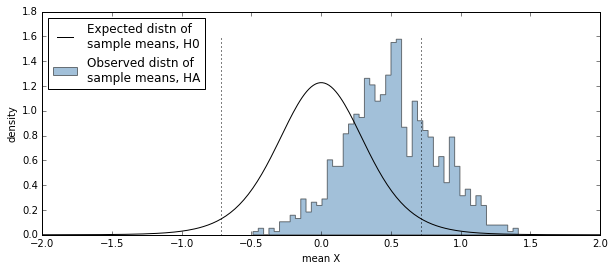

In [6]:
n = 10
mu_null = 0
mu_alt = 0.5
sigma = 1
SE = sigma/np.sqrt(n)
samplingdist_null = stats.t(df=n-1,scale=SE)
dist_alt = stats.norm(loc=mu_alt, scale=sigma)

nsims = 1000
alpha = 0.05
null_left_cutoff  = mu_null + samplingdist_null.ppf(alpha/2)
null_right_cutoff  = mu_null + samplingdist_null.ppf(1-(alpha/2))

sample_means = []
sample_zscores = []

for i in range(nsims):
    sample = dist_alt.rvs(size=n)
    mean = np.mean(sample)
    sample_means.append(mean)
    zscore = mean/np.std(sample,ddof=1)
    sample_zscores.append(zscore)
    
sample_means = np.asarray(sample_means)
sample_zscores = np.asarray(sample_zscores)

fig, ax = plt.subplots(figsize=(10,4))
x = np.linspace(-2,2,250)
ax.plot(x, samplingdist_null.pdf(x), color='black', label="Expected distn of\nsample means, H0")
ax.hist(sample_means, bins=50, normed=True, label="Observed distn of\nsample means, HA",
        color='steelblue', histtype='stepfilled', alpha=0.5)
ax.set_xlabel("mean X")
ax.set_ylabel("density")

min_y, max_y = ax.get_ylim()

# draw left_cutoff
ax.vlines(null_left_cutoff, 0, max_y, linestyle='dotted')
# draw right cutoff
ax.vlines(null_right_cutoff, 0, max_y, linestyle='dotted')

ax.legend(loc='upper left')

failed_to_reject_H0 = np.logical_and(sample_zscores > null_left_cutoff, 
                                     sample_zscores < null_right_cutoff)

How_often_failed_to_reject_H0 = np.count_nonzero(failed_to_reject_H0)/nsims
print("For sample size n =", n)
print("the percent of simulations where we failed to reject H0 is:", 
      How_often_failed_to_reject_H0 * 100)
print("and hence, the percent of simulations where we correctly rejected H0 is:", 
      (1.0 - How_often_failed_to_reject_H0) * 100)

#fig.savefig("fig-powersim-n10.pdf")

pass

For sample size n = 25
the percent of simulations where we failed to reject H0 is: 29.9
and hence, the percent of simulations where we correctly rejected H0 is: 70.10000000000001


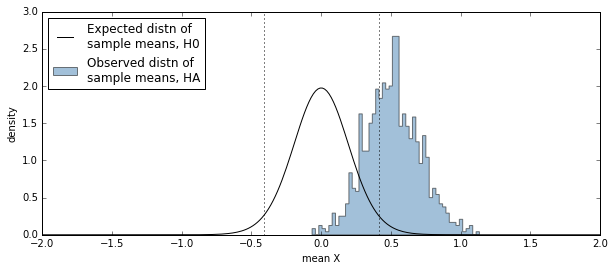

In [7]:
n = 25
mu_null = 0
mu_alt = 0.5
sigma = 1
SE = sigma/np.sqrt(n)
samplingdist_null = stats.t(df=n-1,scale=SE)
dist_alt = stats.norm(loc=mu_alt, scale=sigma)

nsims = 1000
alpha = 0.05
null_left_cutoff  = mu_null + samplingdist_null.ppf(alpha/2)
null_right_cutoff  = mu_null + samplingdist_null.ppf(1-(alpha/2))

sample_means = []
sample_zscores = []

for i in range(nsims):
    sample = dist_alt.rvs(size=n)
    mean = np.mean(sample)
    sample_means.append(mean)
    zscore = mean/np.std(sample,ddof=1)
    sample_zscores.append(zscore)
    
sample_means = np.asarray(sample_means)
sample_zscores = np.asarray(sample_zscores)

fig, ax = plt.subplots(figsize=(10,4))
x = np.linspace(-2,2,250)
ax.plot(x, samplingdist_null.pdf(x), color='black', label="Expected distn of\nsample means, H0")
ax.hist(sample_means, bins=50, normed=True, label="Observed distn of\nsample means, HA",
        color='steelblue', histtype='stepfilled', alpha=0.5)
ax.set_xlabel("mean X")
ax.set_ylabel("density")

min_y, max_y = ax.get_ylim()

# draw left_cutoff
ax.vlines(null_left_cutoff, 0, max_y, linestyle='dotted')
# draw right cutoff
ax.vlines(null_right_cutoff, 0, max_y, linestyle='dotted')

ax.legend(loc='upper left')

failed_to_reject_H0 = np.logical_and(sample_zscores > null_left_cutoff, 
                                     sample_zscores < null_right_cutoff)

How_often_failed_to_reject_H0 = np.count_nonzero(failed_to_reject_H0)/nsims
print("For sample size n =", n)
print("the percent of simulations where we failed to reject H0 is:", 
      How_often_failed_to_reject_H0 * 100)
print("and hence, the percent of simulations where we correctly rejected H0 is:", 
      (1.0 - How_often_failed_to_reject_H0) * 100)

pass

For sample size n = 50
the percent of simulations where we failed to reject H0 is: 5.7
and hence, the percent of simulations where we correctly rejected H0 is: 94.3


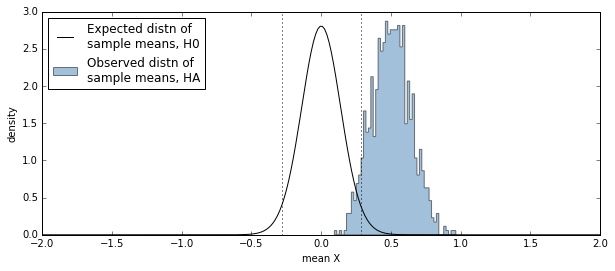

In [8]:
n = 50
mu_null = 0
mu_alt = 0.5
sigma = 1
SE = sigma/np.sqrt(n)
samplingdist_null = stats.t(df=n-1,scale=SE)
dist_alt = stats.norm(loc=mu_alt, scale=sigma)

nsims = 1000
alpha = 0.05
null_left_cutoff  = mu_null + samplingdist_null.ppf(alpha/2)
null_right_cutoff  = mu_null + samplingdist_null.ppf(1-(alpha/2))

sample_means = []
sample_zscores = []

for i in range(nsims):
    sample = dist_alt.rvs(size=n)
    mean = np.mean(sample)
    sample_means.append(mean)
    zscore = mean/np.std(sample,ddof=1)
    sample_zscores.append(zscore)
    
sample_means = np.asarray(sample_means)
sample_zscores = np.asarray(sample_zscores)

fig, ax = plt.subplots(figsize=(10,4))
x = np.linspace(-2,2,250)
ax.plot(x, samplingdist_null.pdf(x), color='black', label="Expected distn of\nsample means, H0")
ax.hist(sample_means, bins=50, normed=True, label="Observed distn of\nsample means, HA",
        color='steelblue', histtype='stepfilled', alpha=0.5)
ax.set_xlabel("mean X")
ax.set_ylabel("density")

min_y, max_y = ax.get_ylim()

# draw left_cutoff
ax.vlines(null_left_cutoff, 0, max_y, linestyle='dotted')
# draw right cutoff
ax.vlines(null_right_cutoff, 0, max_y, linestyle='dotted')

ax.legend(loc='upper left')

failed_to_reject_H0 = np.logical_and(sample_zscores > null_left_cutoff, 
                                     sample_zscores < null_right_cutoff)

How_often_failed_to_reject_H0 = np.count_nonzero(failed_to_reject_H0)/nsims
print("For sample size n =", n)
print("the percent of simulations where we failed to reject H0 is:", 
      How_often_failed_to_reject_H0 * 100)
print("and hence, the percent of simulations where we correctly rejected H0 is:", 
      (1.0 - How_often_failed_to_reject_H0) * 100)

pass

We can repeat this exercise for multiple sample sizes as shown below.

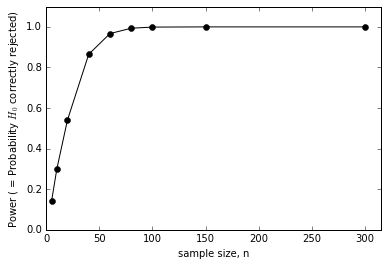

In [9]:
mu_null = 0
mu_alt = 0.5
sigma = 1

nsims = 2000
sizes = [5, 10, 20, 40, 60, 80, 100, 150, 300]

alpha = 0.05
SEs = [sigma/np.sqrt(i) for i in sizes]
left_cutoffs = [mu_null + stats.t.ppf(alpha/2, df=i-1, loc=mu_null, scale=j)
               for (i,j) in zip(sizes, SEs)]
right_cutoffs = [mu_null + stats.t.ppf((1-alpha/2), df=i-1, loc=mu_null, scale=j)
               for (i,j) in zip(sizes,SEs)]

dist_alt = stats.norm(loc=mu_alt, scale=sigma)
samples = [dist_alt.rvs(size=(i, nsims)) for i in sizes]
sample_means = np.asarray([np.mean(i, axis=0) for i in samples])
sample_stds = np.asarray([np.std(i, ddof=1, axis=0) for i in samples])
sample_zs = (sample_means-mu_null)/sample_stds

failed_to_reject_H0 = [np.logical_and(i > left, i < right) for (i, left, right) 
                       in zip(sample_zs, left_cutoffs, right_cutoffs)]

frac_failed_to_reject_H0 = [np.count_nonzero(i)/nsims for i in failed_to_reject_H0]

correctly_rejected_H0 = [(1-i) for i in frac_failed_to_reject_H0]

fig, ax = plt.subplots(figsize=(6,4))
ax.plot(sizes, correctly_rejected_H0, marker='o', color='black')
ax.set_xlabel("sample size, n")
ax.set_ylabel("Power ( = Probability $H_0$ correctly rejected)")
ax.set_ylim(0,1.1)
ax.set_xlim(0, max(sizes)*1.05)

#fig.savefig('fig-powercurve-diff05.pdf')
pass

### Varying both sample size and effect size

In the simulations above we kept the effect size (the difference between the mean of the null and true distributions in our example) constant.  Now let's explore how both sample size and effect size influence power. We'll consider three different scenarios -- $\mu_{H_A} = 1$, $\mu_{H_A} = 0.5$, and $\mu_{H_A} = 0.25$ ($\mu_{H_0} = 0$ in all three cases). As before,  the significance threshold, $\alpha = 0.5$, for all the simulations.

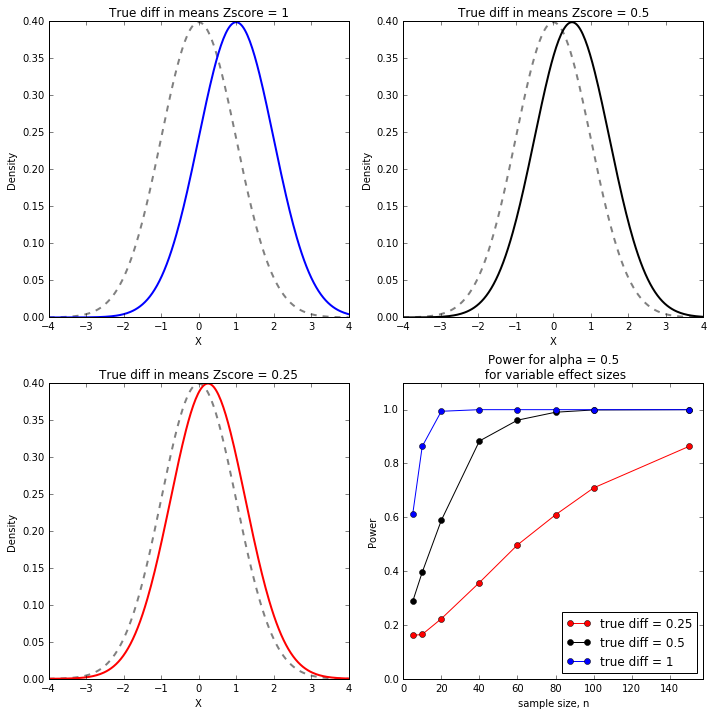

In [10]:

def power_sim(mu_null, mu_alt, sigma, alpha=0.05,
             ssizes = [5, 10, 20, 40, 60, 80, 100, 150],
             nsims = 2000):

    SEs = [sigma/np.sqrt(i) for i in ssizes]
    left_cutoffs = [mu_null + stats.norm.ppf(alpha/2, loc=mu_null, scale=i)
               for i in SEs]
    right_cutoffs = [mu_null + stats.norm.ppf((1-alpha/2), loc=mu_null, scale=i)
               for i in SEs]

    dist_alt = stats.norm(loc=mu_alt, scale=sigma)
    samples = [dist_alt.rvs(size=(i, nsims)) for i in ssizes]
    sample_means = np.asarray([np.mean(i, axis=0) for i in samples])
    sample_stds = np.asarray([np.std(i, ddof=1, axis=0) for i in samples])
    sample_zs = (sample_means-mu_null)/sample_stds

    failed_to_reject_H0 = [np.logical_and(i > left, i < right) for (i, left, right) 
                       in zip(sample_zs, left_cutoffs, right_cutoffs)]

    frac_failed_to_reject_H0 = [np.count_nonzero(i)/nsims for i in failed_to_reject_H0]

    correctly_rejected_H0 = [(1-i) for i in frac_failed_to_reject_H0]
    return ssizes, correctly_rejected_H0



ssizes, power025 = power_sim(0, 0.25, 1)
ssizes, power05 = power_sim(0, 0.5, 1)
ssizes, power1 = power_sim(0, 1, 1)


fig, ((ax1,ax2),(ax3,ax4)) = plt.subplots(2, 2, figsize=(10,10))

x = np.linspace(-4,4,250)
ax1.plot(x, stats.norm.pdf(x), linestyle='dashed', color='gray', linewidth=2)
ax1.plot(x, stats.norm.pdf(x, loc=1), color='blue', linewidth=2)
ax1.set_xlabel("X")
ax1.set_ylabel("Density")
ax1.set_title("True diff in means Zscore = 1")

ax2.plot(x, stats.norm.pdf(x), linestyle='dashed', color='gray', linewidth=2)
ax2.plot(x, stats.norm.pdf(x, loc=0.5), color='black', linewidth=2)
ax2.set_xlabel("X")
ax2.set_ylabel("Density")
ax2.set_title("True diff in means Zscore = 0.5")

ax3.plot(x, stats.norm.pdf(x), linestyle='dashed', color='gray', linewidth=2)
ax3.plot(x, stats.norm.pdf(x, loc=0.25), color='red', linewidth=2)
ax3.set_xlabel("X")
ax3.set_ylabel("Density")
ax3.set_title("True diff in means Zscore = 0.25")

ax4.plot(ssizes, power025, marker='o', color='red', label="true diff = 0.25")
ax4.plot(ssizes, power05, marker='o', color='black', label="true diff = 0.5")
ax4.plot(ssizes, power1, marker='o', color='blue', label="true diff = 1")
ax4.set_xlabel("sample size, n")
ax4.set_ylabel("Power")
ax4.set_ylim(0,1.1)
ax4.set_xlim(0, max(ssizes)*1.05)
ax4.legend(loc='best')
ax4.set_title("Power for alpha = 0.5\n for variable effect sizes")

fig.tight_layout()
#fig.savefig('fig-powercurves-variable-diffs.pdf')

pass

As intuition would suggest, we need to consider sample size and effect size when considering the power of a test.  We can get away with fewer samples of the effect size is very large.